# «Определение "портрета" пользователя игровых платформ»

## Предобработка данных

### Импорт библиотек

In [1]:
#импортируем библиотеку pandas
#импортируем библиотеку seaborn для графиков
#импортируем библиотекуnumpy 
#импортируем библиотеку matplotlib для графиков
#импортируем библиотеку для проверки гипотиз 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#открываем данные 
data = pd.read_csv('/datasets/games.csv')
#создаём датасет который всегда будет без правок
raw_shape = data.shape

In [3]:
#проверяем дубликаты
data.duplicated().sum()

0

In [4]:
#смотрим основную информацию 
print(data.info())
display(data.head())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


(16715, 11)


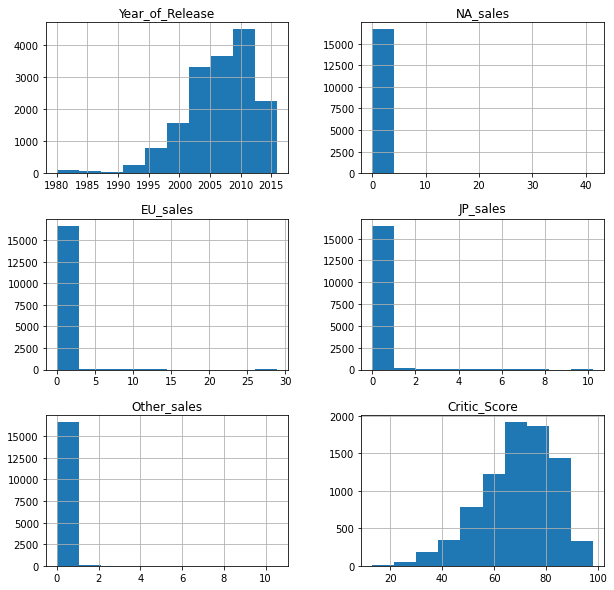

In [5]:
#построим гистограммы по всем столбцам , проверим что интересного можно подчерпнуть из визуализации
#и вообще понять что есть в таблице
data.hist(figsize=(10,10));


По графикам выше видно, что наиболее, "урожайным" годом на продажи был конец 10 годов, потом резкое снижение

С продажами надо разбираться

Оценка критиков в общей массе далека от 100 баллов, в среднем оценки у всех от 60 до 90 пунктов


In [6]:
#проверяем столбцы с пропусками
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#привеоди столбецы в один вид, все называния столбцов в строчном виде
data.columns = data.columns.str.lower()

In [8]:
#убираем 2 пропущеных значения в названии игры , их мы точно заменить  ничем не сможем

data = data.dropna(subset =['name'])

In [9]:
#убираем 269 пропущенных значения в годах выхода, так как это всего лишь 2% ими можно пренебречь,
# а вот если заменить на "средний" или "медианный" можно некорректно отобразить данные за какой-то период, ответ убрать  

data = data.dropna(subset =['year_of_release'])

In [10]:
#убираем 2 пропущеных значения в столбце жанр

data = data.dropna(subset =['genre'])

Пропуски в оценке критиков оставлены как NaN для того чтобы возможно было изменить тип на численный

In [11]:
#рассшифровка аббревиатуры 'tbd' как подсказал поисковик это  to be determined , тоесть еще не опрпделенео или 
#будет определено
#тоесть эти строки бесполезны для работы с оценкой пользателей эти строки непригодны ,
#к такому варианту пропусков скорее всего
#привело отсутствие оценок 
#убрать их
#меняем  to be determined на NaN 
# ***без добавления библиотеки 'numpy' я так и не смог заменить значения на пустые не полнял почему***
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Пропуски в оценке пользователей изменены с 'tbd' на NaN для того чтобы возможно было изменить тип на численный

In [12]:
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [13]:
#медиану по буквам не рассчитать, я могу предложить проверить на интернет ресурсах 
#какая игра к какому рейтингу принадлежит, однако это займет несколько недель,
#вывод придется удалить 6766 строк
data['rating'] = data['rating'].replace(np.NaN, 'unknown')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [15]:
data.shape[0] / 16714

0.9838458777073112

In [16]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


### Работа с Типами данных

In [17]:
#преобразуе данные в нужные типы
#годы пишутся без запятых ,в тип датавремя тоже переводить не нужно , так как нет месяцев дней и тп
data['year_of_release'] = data['year_of_release'].astype(int)

#оценка пользователей формируется в числах с запятой 
data['user_score'] = data['user_score'].astype(float)

#оценка критиковформируется от 1 до 100 без запятых , делаем целочисленные выражения 
data['critic_score'] = data['critic_score'].astype(float)

In [18]:
#Проверяем сколько процентов данных мы отбросили
(data.shape[0] / raw_shape[0]) *100

#Много конечно убрано, знаю что более 10% выбрасывать нельзя , но данные с пропусками тоже не пойдут впрок

98.37870176488184

In [19]:
#Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец. 
#data['total_sales_all regeon'] = data.groupby('name')['na_sales'].sum()
data['total_sales_all_regeon'] = data[['na_sales', 'eu_sales','jp_sales','other_sales']].sum(axis = 1)

In [20]:
#Убираем ненужные индкексы 
data = data.reset_index(drop=True)

In [21]:
# Проверяем как сработал код на новый столбец
display(data.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_all_regeon
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


Работа над шагом - "Подготовьте данные" - завершена  


## Работа над шагом - Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


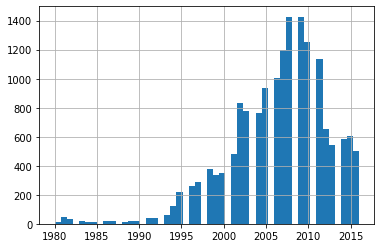

In [22]:
#data['year_of_release'].value_counts()
data['year_of_release'].hist(bins=50,range = (1980,2016));

In [23]:
display(data['year_of_release'].value_counts())

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Ответ

Данные c 1980 года по 1990 можно опустить и считать их выбросами, игровая индустрия еще только развивалась, 
к концу 10-х годов был рассвет выпуска игр, их колличество было как никогда велико.

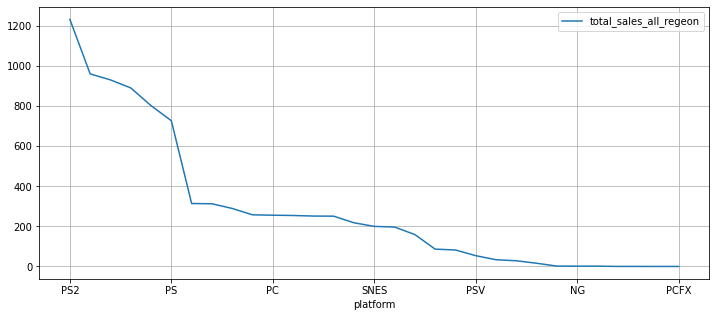

In [77]:
#разобьем на задачи
#1 выберем платформы с наибольшими СУММАРНЫМИ продажами
#используем новый столбец
#sales_sum = data.groupby(['platform', 'year_of_release'])['total_sales_all_regeon'].count()
#display(sales_sum)
(
    data
     .pivot_table(index = 'platform', values = 'total_sales_all_regeon', aggfunc='sum')
     .sort_values(by ='total_sales_all_regeon', ascending = False)
     .plot(grid = True,figsize = (12,5))
);

График показывает у какой платформы самые большие продажи за ВСЁ время 

Это PS2 и PS 

In [25]:
#Ищим топ 5 приставок за ВСЁ время
first_five_platforms = (
    data
    .groupby('platform')['total_sales_all_regeon'].sum().sort_values(ascending = False) 
    .head()
)
#first_five_platforms

5-ка лидеров в большом отрыве от остальных ответ

На первый вопрос , ответ найден

In [26]:
first_five_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales_all_regeon, dtype: float64

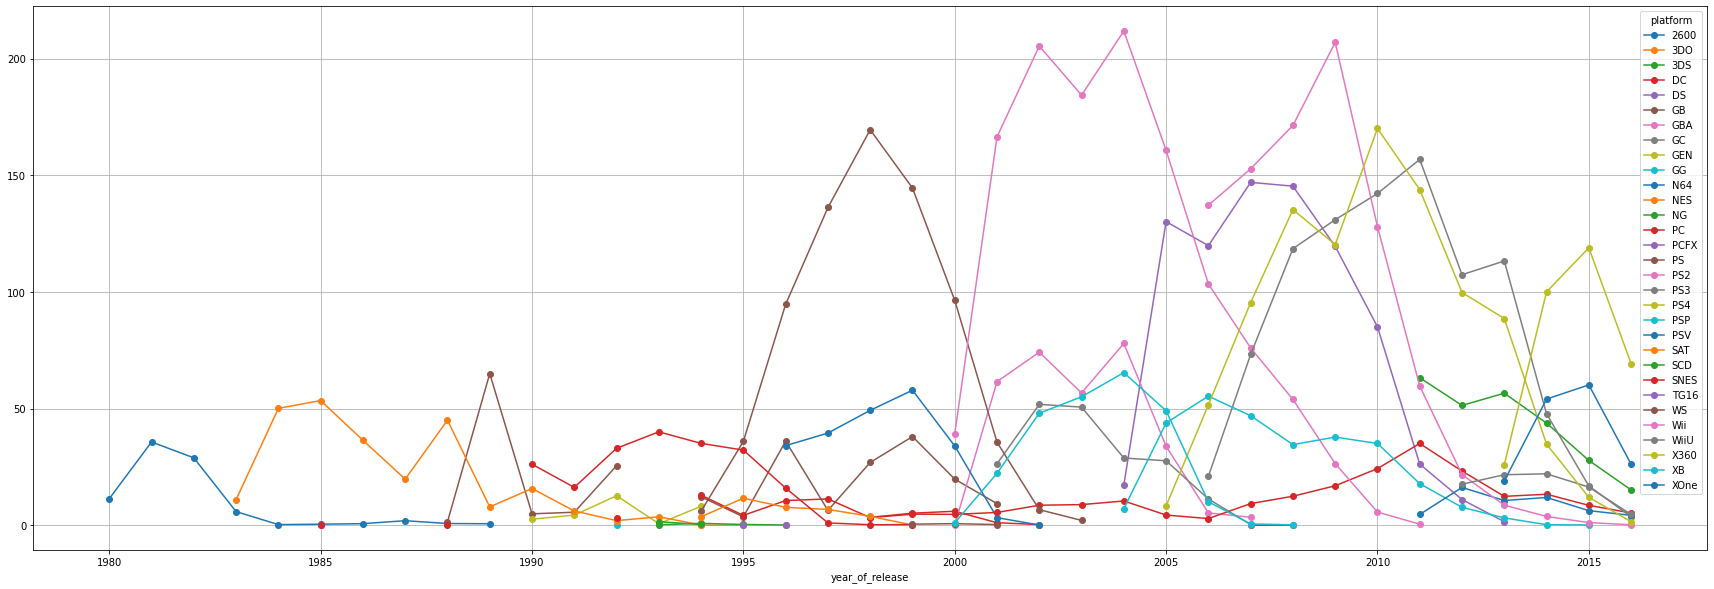

In [27]:
#задача 2 постройте распределение по годам
# берём сводную таблицу и нам нужно распределить ПРИСТАВКИ по годам

#когда какая была

data.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales_all_regeon',
    aggfunc = 'sum'
).plot(
    grid=True,
    figsize=(30, 10),
    style='o-');
         


на графике распределение по годам:

все вместе очень тяжело для восприятия так как линий много и они путаются,
нас должен спасити формат листа А1 или большой экран , тогда будет масштабно

можно попробовать сделать сначала срез по приставкам, так будет легче для прочтения,
допустим то же самое для топ пяти приставок


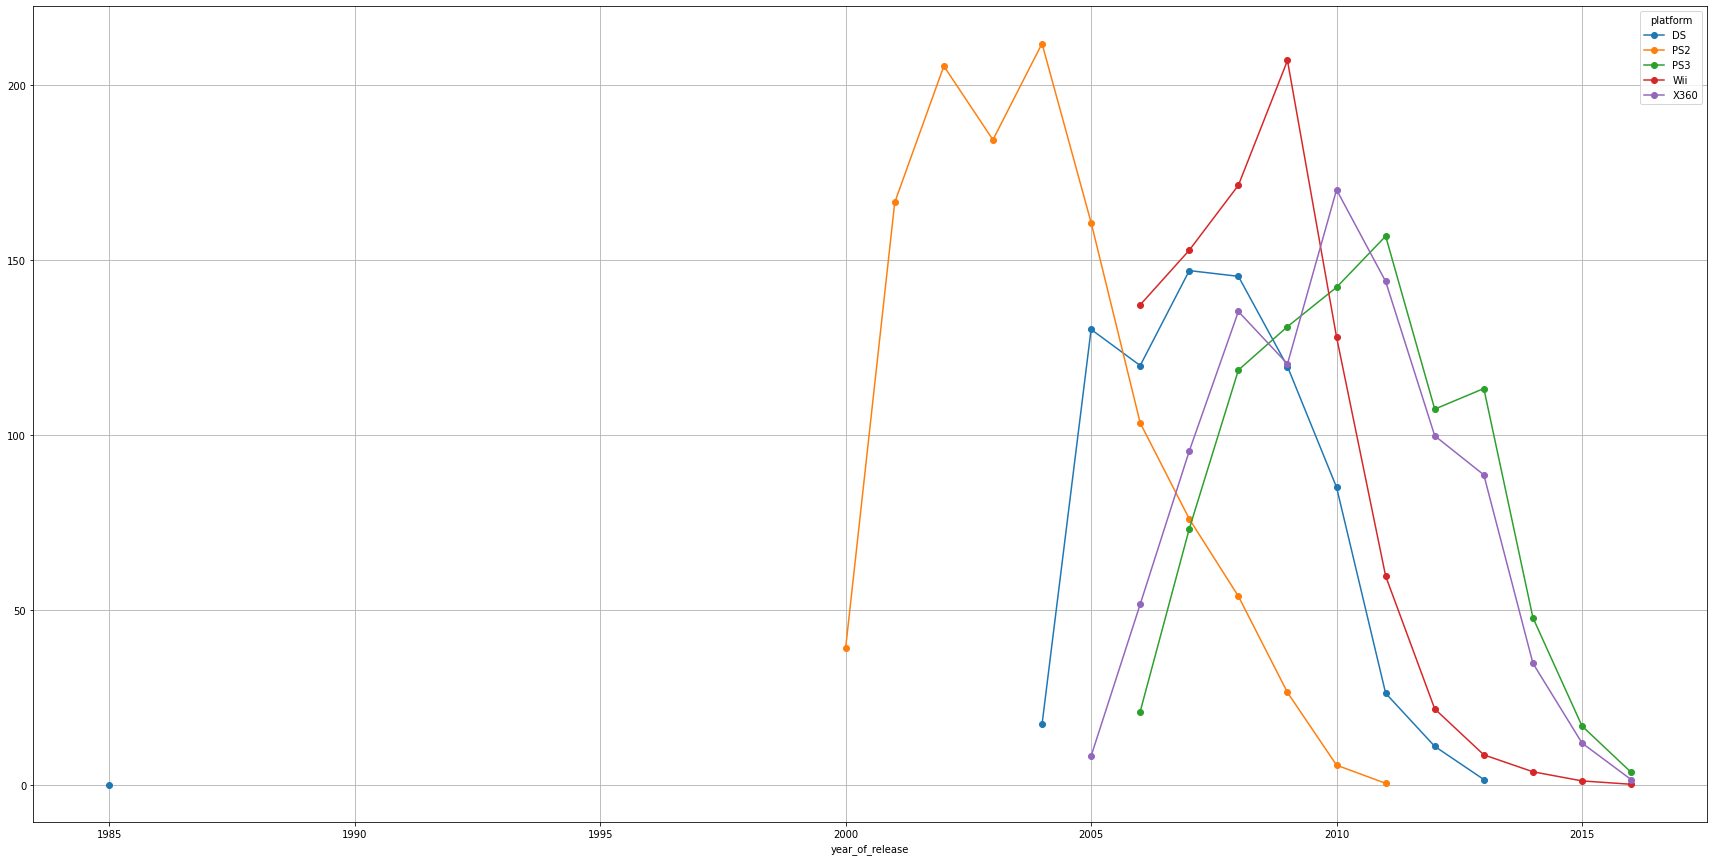

In [28]:
#Для примера делаем срез по первым приставкам за ВСЁ время и выизуализацию
five_best_sellers = data.query('platform =="PS2" or platform =="X360" or platform =="PS3" or platform =="Wii" or platform =="DS"')
five_best_sellers.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales_all_regeon',
    aggfunc = 'sum'
).plot(
    grid=True,
    figsize=(30, 15),
    style='o-');
         

Так  смотреть приятнее, но потерялачь часть информации 
как можно визуально предположить среднее время существования приствки от взлета до почти нулевых продаж это десять лет

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    16444 non-null  object 
 1   platform                16444 non-null  object 
 2   year_of_release         16444 non-null  int64  
 3   genre                   16444 non-null  object 
 4   na_sales                16444 non-null  float64
 5   eu_sales                16444 non-null  float64
 6   jp_sales                16444 non-null  float64
 7   other_sales             16444 non-null  float64
 8   critic_score            7983 non-null   float64
 9   user_score              7463 non-null   float64
 10  rating                  16444 non-null  object 
 11  total_sales_all_regeon  16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


### Берём данный за 2014 до 2016 года, так как на их основе мы будем делать прогноз на 2017 год  

In [30]:
#делаем срез по нужным годам
data_2014_2016 = data.query('year_of_release >=2014  and year_of_release <=2016')
data_2014_2016.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_all_regeon
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [31]:
#приыводим индексы таблицы к нормальному виду
data_2014_2016 = data_2014_2016.reset_index(drop=True)

In [32]:
#data_2015_2016.head(10)

In [33]:
first_five_platforms_2014_2016 = (
    data_2014_2016
    .groupby('platform')['total_sales_all_regeon'].sum().sort_values(ascending = False) 
    .head()
)
#first_five_platforms

Какие платформы лидируют по продажам? Выберите несколько потенциально прибыльных платформ.

платформа PS4 и 3DS заметные лидеры за этот период

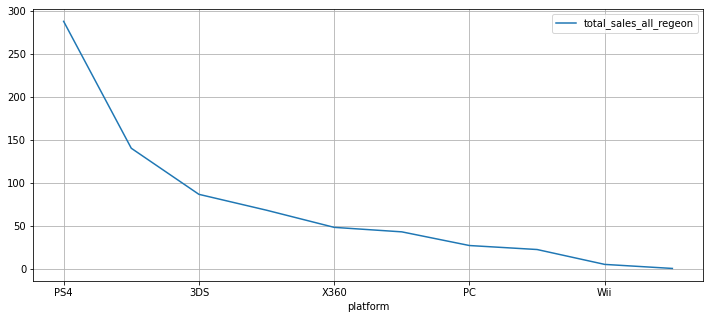

In [34]:
#ищим кто за период 2010-2016 был в ТОПЕ
(
    data_2014_2016
     .pivot_table(index = 'platform', values = 'total_sales_all_regeon', aggfunc='sum')
     .sort_values(by ='total_sales_all_regeon', ascending = False)
     .plot(grid = True,figsize = (12,5))
);

### Какие платформы растут или падают?

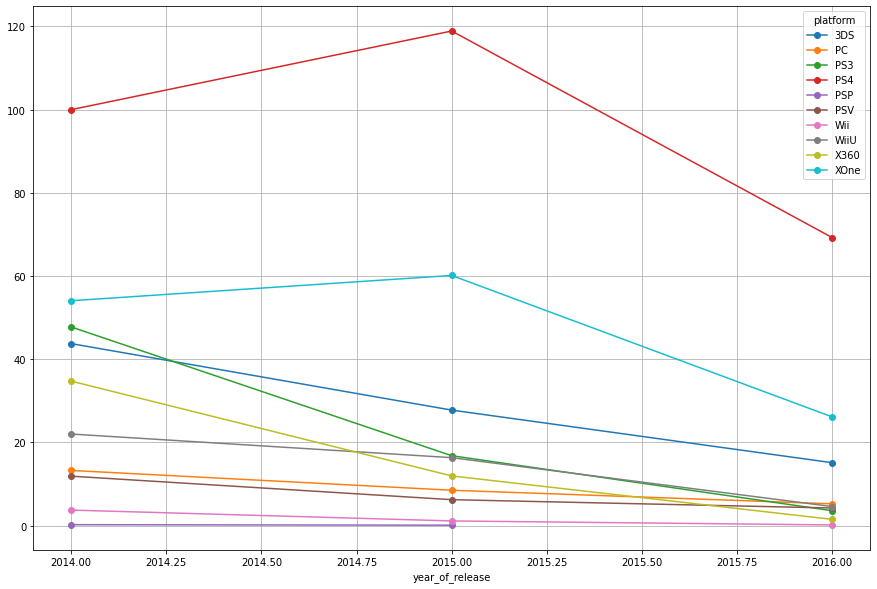

In [35]:
#строим сводную таюлицу по выбраным годам и выводим 
data_2014_2016.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales_all_regeon',
    aggfunc = 'sum'
).plot(
    grid=True,
    figsize=(15, 10),
    style='o-');

Как убрать 2014.00 нули из годов я не понял , скорее всего нужен правильнфый тип данных ???

Как видно из графика:

    
1)Продажи 2-х топовых платформ росли, но в последнее время тенденция к просадке продаж

2)PS4 и XOne топовые платформы ,вышли не так давно ,PS4 имеет большой отрыв от остальных 
платформ.
XOne также набирал обороты, однако проигрывает PS4 по масштабу продаж и снижает продажи 

3) снижение продаж показывают также платформы 3DS, X360 и д


### Строим график «ящик с усами»

1)По глобальным продажам игр

2)В разбивке по платформам.

3)Опишите результат.


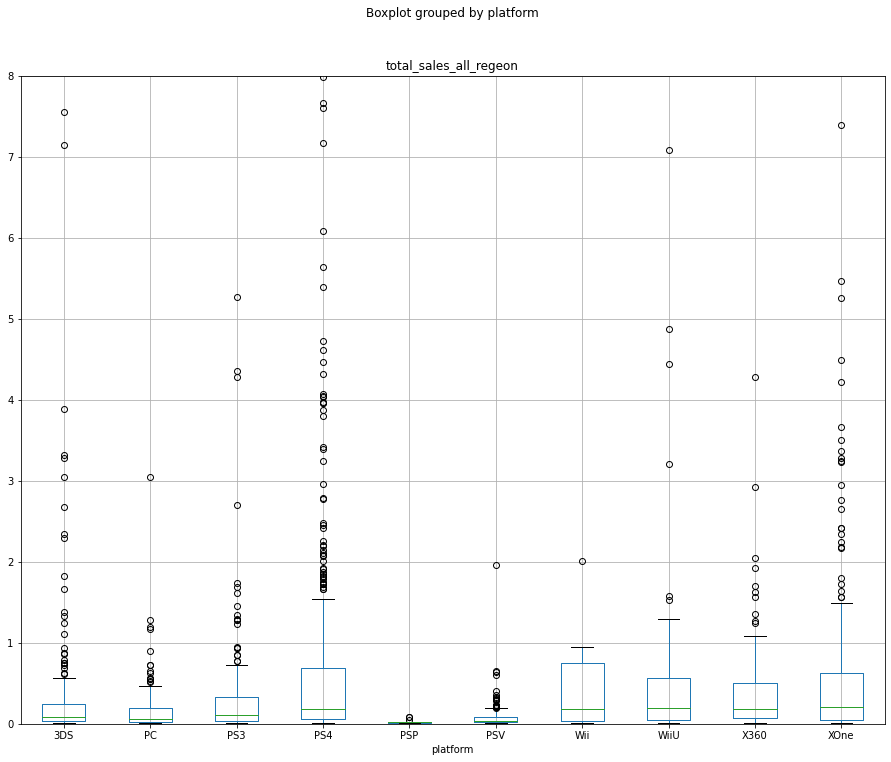

In [36]:
#data.boxplot(column='total_sales_all_regeon',by='platform')
#добавляем лимит по оси Y так как были выбросы и до 80 милионов и тогда не видна сама коробка


data_2014_2016.boxplot(column = 'total_sales_all_regeon', by='platform', figsize=(15,12))
plt.ylim(0, 8)
plt.show()

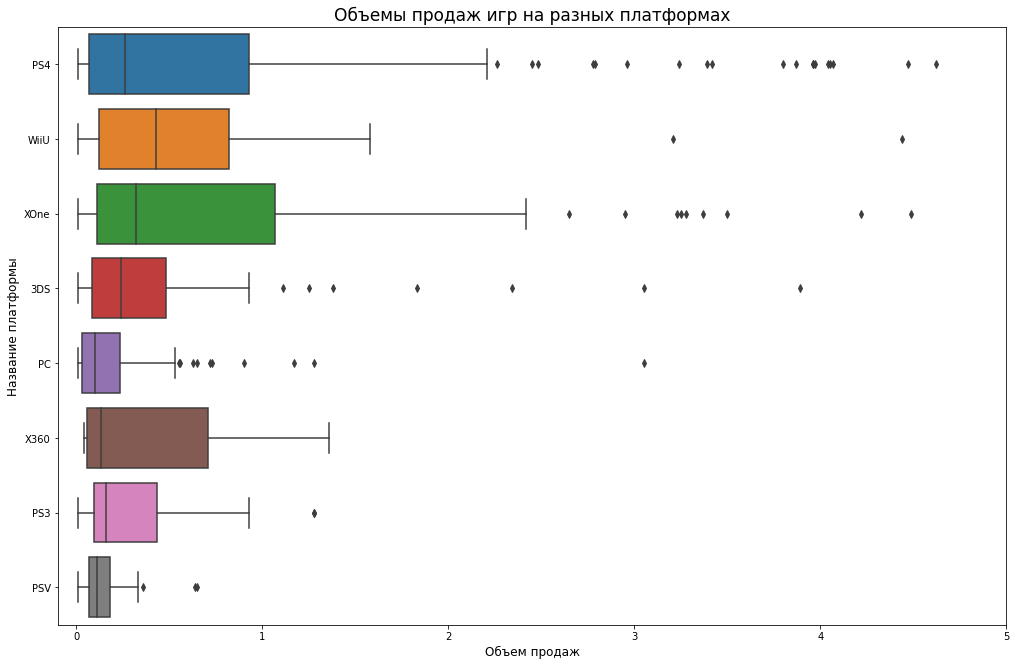

In [78]:
plt.figure(figsize=(17, 11))
sns.boxplot(data=data_2014_2016, y='platform', x='total_sales_all_regeon')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

Из диаграмы размаха видно что:

    
1)самые высокие продажи у PS4, а также WiiU,X360 и XOne.

2)выбросы есть у всех платформ , тоесть когдато у каждого случались отличные продажи или 
гос закупки закупки для детских садов и школ)

3)Медианы продаж у топов находятся примерно на одном уровне 



### Посмотрим, как влияют на ПРОДАЖИ внутри одной популярной платформы отзывы пользователей и критиков. 

Постройте диаграмму рассеяния 

и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.    



In [38]:
#я взял самую популярную платформу PS4
ps_four_platform = data_2014_2016.query('platform =="PS4"')

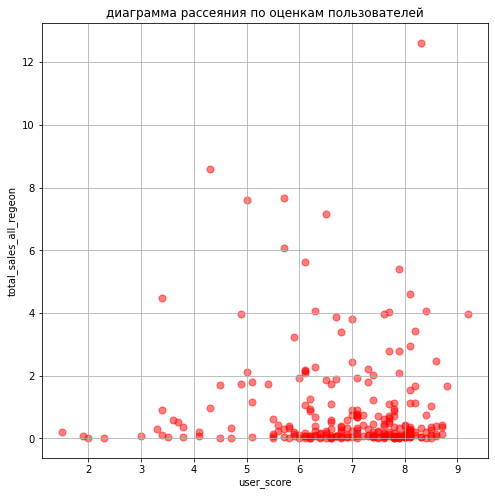

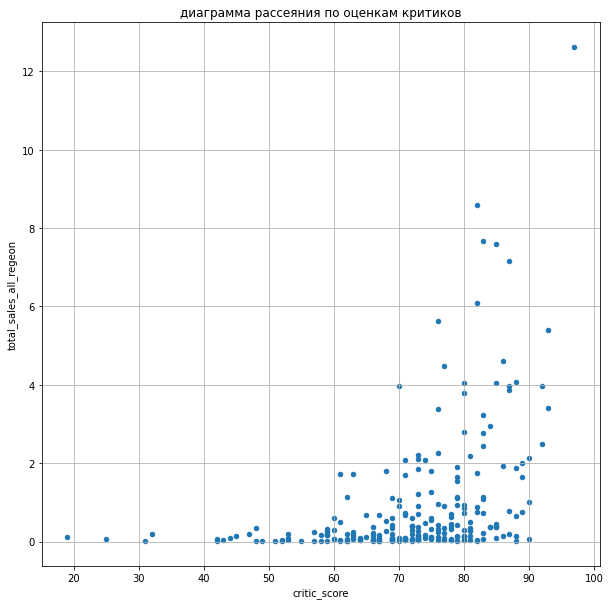

In [39]:
#строим два графика
ps_four_platform.plot(
    x='user_score',
    y='total_sales_all_regeon',
    kind='scatter',
    grid = True,
    figsize=(8, 8),
    c='red',
    alpha=0.5,
    s=50,
    title ='диаграмма рассеяния по оценкам пользователей');

ps_four_platform.plot(
    x='critic_score',
    y='total_sales_all_regeon',
    kind='scatter',
    grid = True,
    figsize=(10, 10),
    title ='диаграмма рассеяния по оценкам критиков');




In [40]:
#Считаем кореляцию
print('корреляцию между отзывами пользователей и продажами',data_2014_2016['total_sales_all_regeon'].corr(data_2014_2016['user_score']))
print()
print('корреляцию между отзывами критиков и продажами',data_2014_2016['total_sales_all_regeon'].corr(data_2014_2016['critic_score']))

корреляцию между отзывами пользователей и продажами -0.013070305002484585

корреляцию между отзывами критиков и продажами 0.328105086966363


Вывод по диаграммам рассеяния:


Диаграмма номер №1 построена чтобы отразить как влияют на ПРОДАЖИ внутри одной популярной платформы отзывы пользователей
по диаграмме выше видно, что чем выше оценка, тем больше продаж

Диаграмма номер №2 построена чтобы отразить как влияют на ПРОДАЖИ внутри одной популярной платформы отзывы критиков
по диаграмме выше видно, что чем выше оценка, тем больше продаж

выводы о корреляции между отзывами и продажами:

корреляцию между отзывами пользователей и продажами отрицательная и очень мала 

корреляцию между отзывами критиков и продажами средняя положительная, хотя диаграмма выше всё-таки показывает взаимосвязь, за оценки критиков нужно держатся они формируют спрос

    

### Соотнесите выводы с продажами игр на других платформах.

In [41]:
data_2014_2016.groupby('platform')['total_sales_all_regeon'].describe().sort_values(by= 'count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09


In [42]:
#Ищим топ 5 приставок за АТУАЛЬНЫЙ ПЕРИОД
five_best_sellers_2014_2016 = (
    data_2014_2016
    .groupby('platform')['total_sales_all_regeon'].sum().sort_values(ascending = False) 
    .head()
)

In [43]:
five_best_sellers_2014_2016

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: total_sales_all_regeon, dtype: float64

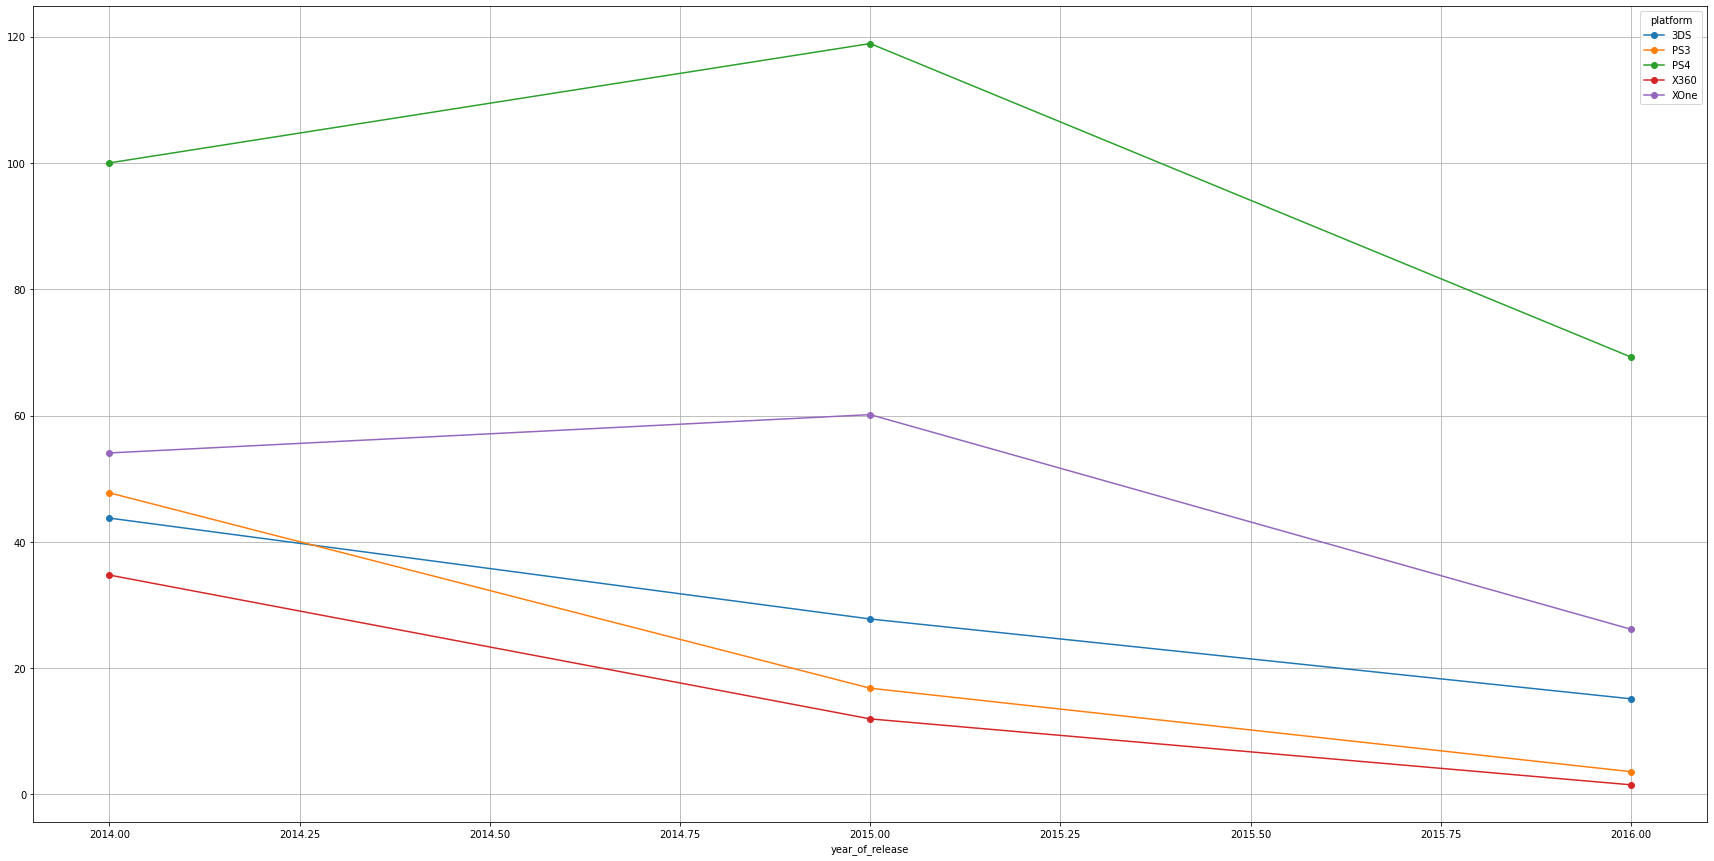

In [44]:
five_best_sellers_2014_2016 = data_2014_2016.query('platform =="PS4" or platform =="XOne" or platform =="3DS" or platform =="PS3" or platform =="X360"')
five_best_sellers_2014_2016.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales_all_regeon',
    aggfunc = 'sum'
).plot(
    grid=True,
    figsize=(30, 15),
    style='o-');
         

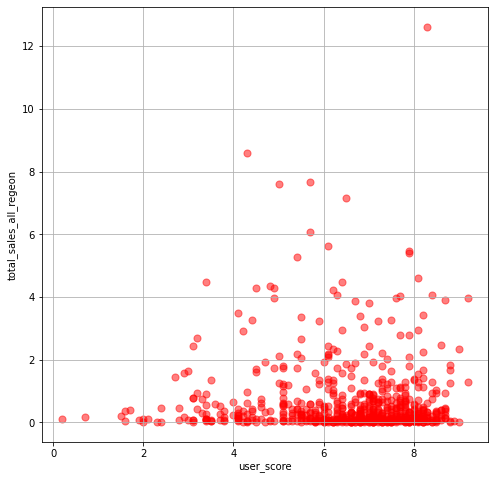

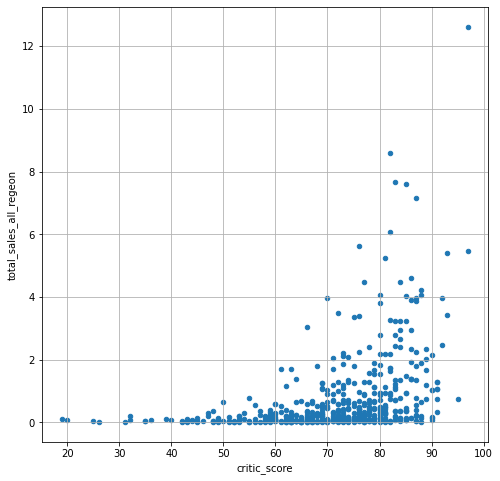

In [45]:
five_best_sellers_2014_2016.plot(
    x='user_score',
    y='total_sales_all_regeon',
    kind='scatter',
    grid = True,
    figsize=(8, 8),
    c='red',
    alpha=0.5,
    s=50);

five_best_sellers_2014_2016.plot(
    x='critic_score',
    y='total_sales_all_regeon',
    kind='scatter',
    grid = True,
    figsize=(8, 8));



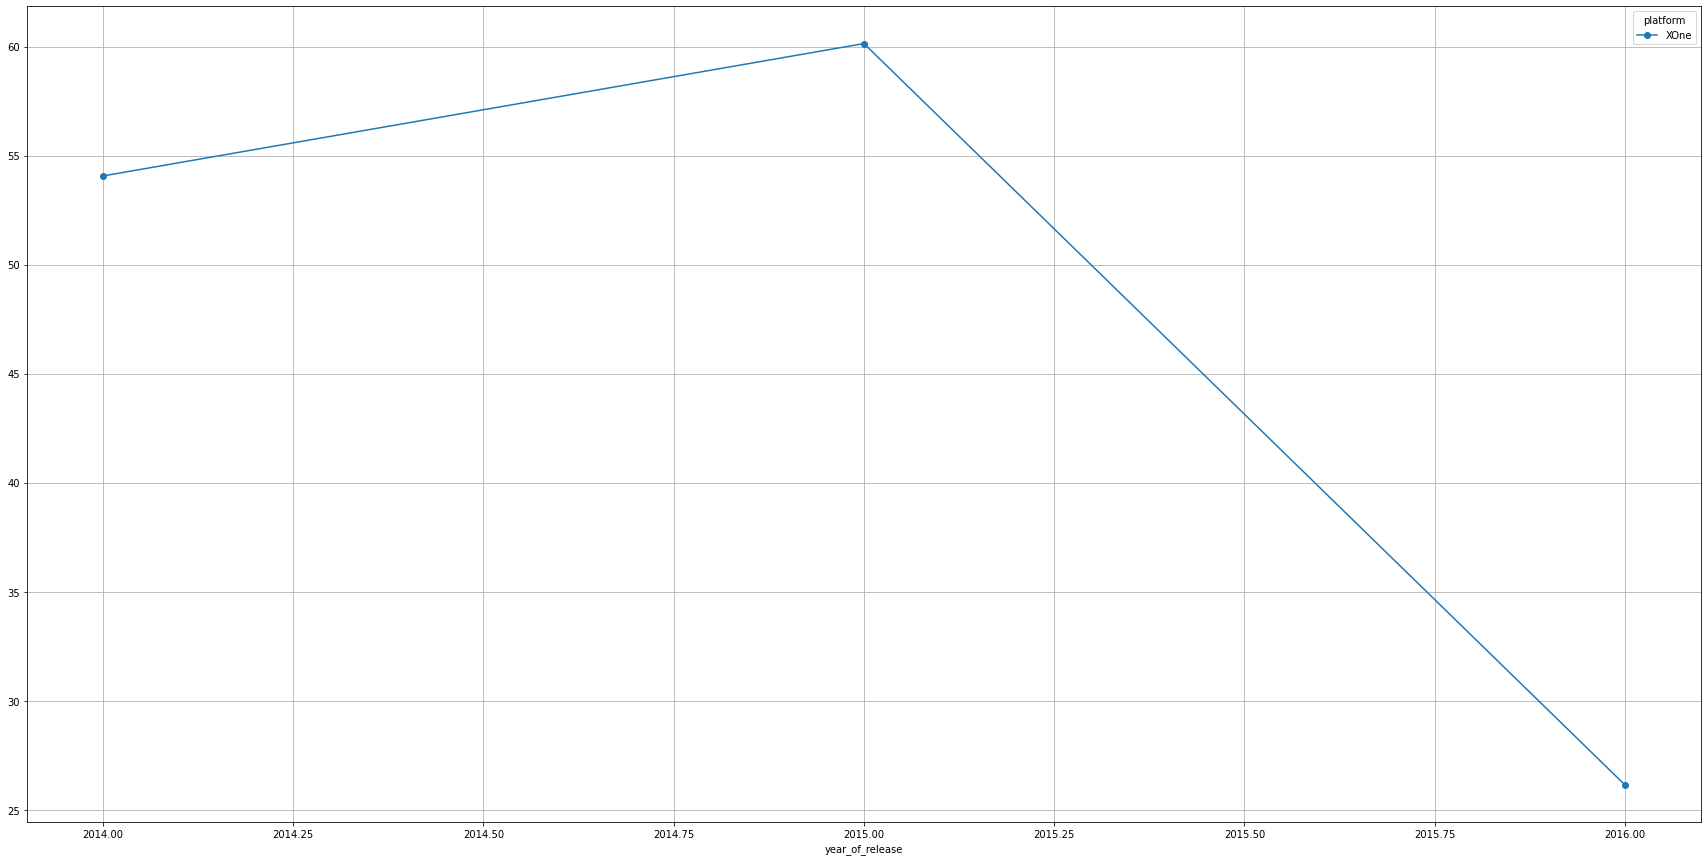

In [46]:
platform_xone = data_2014_2016.query('platform =="XOne"')
platform_xone.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales_all_regeon',
    aggfunc = 'sum'
).plot(
    grid=True,
    figsize=(30, 15),
    style='o-');

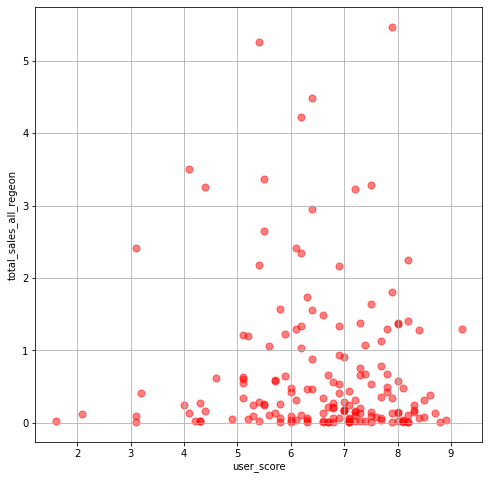

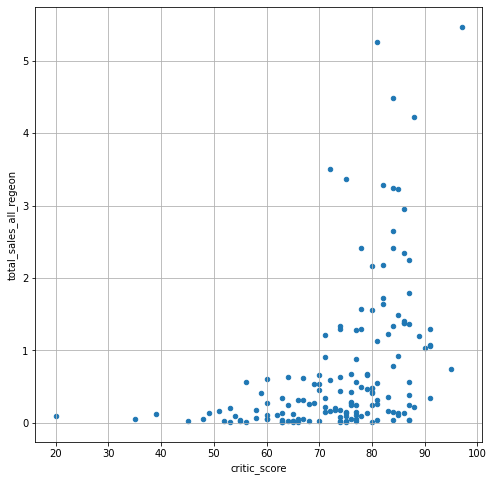

In [47]:
platform_xone.plot(
    x='user_score',
    y='total_sales_all_regeon',
    kind='scatter',
    grid = True,
    figsize=(8, 8),
    c='red',
    alpha=0.5,
    s=50);

platform_xone.plot(
    x='critic_score',
    y='total_sales_all_regeon',
    kind='scatter',
    grid = True,
    figsize=(8, 8));


Считаем кореляцию для платформы XOne

In [48]:
print('корреляцию между отзывами пользователей и продажами',platform_xone['total_sales_all_regeon'].corr(platform_xone['user_score']))
print()
print('корреляцию между отзывами критиков и продажами',platform_xone['total_sales_all_regeon'].corr(platform_xone['critic_score']))

корреляцию между отзывами пользователей и продажами -0.0703839280647581

корреляцию между отзывами критиков и продажами 0.42867694370333226


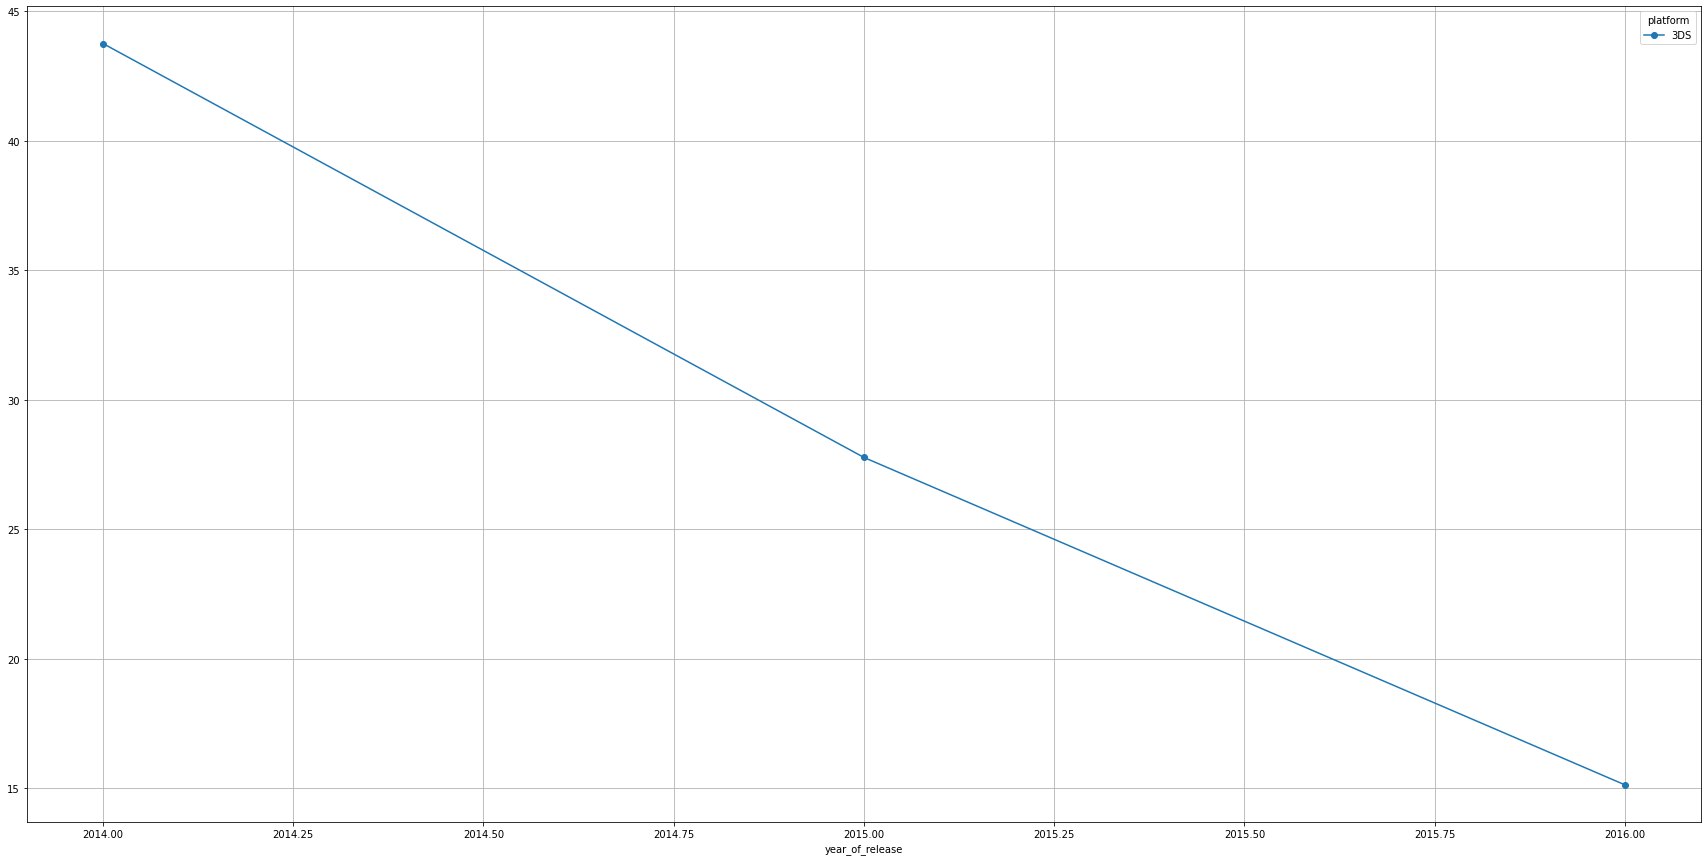

In [49]:
platform_3ds = data_2014_2016.query('platform =="3DS"')
platform_3ds.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales_all_regeon',
    aggfunc = 'sum'
).plot(
    grid=True,
    figsize=(30, 15),
    style='o-');

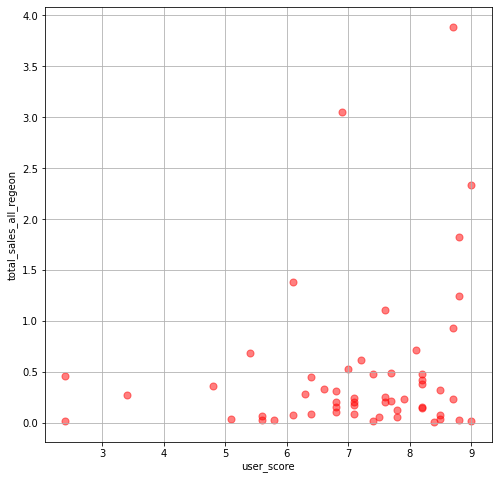

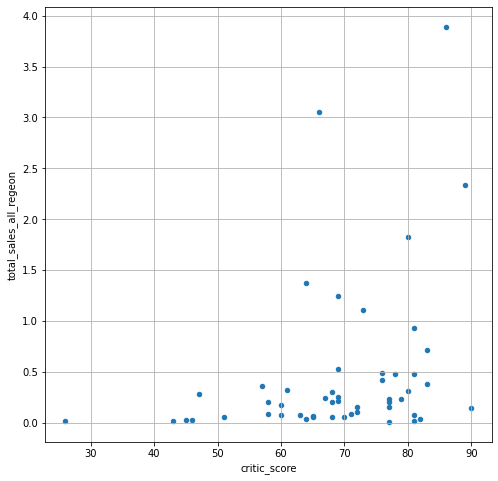

In [50]:
platform_3ds.plot(
    x='user_score',
    y='total_sales_all_regeon',
    kind='scatter',
    grid = True,
    figsize=(8, 8),
    c='red',
    alpha=0.5,
    s=50);

platform_3ds.plot(
    x='critic_score',
    y='total_sales_all_regeon',
    kind='scatter',
    grid = True,
    figsize=(8, 8));


In [51]:
print('корреляцию между отзывами пользователей и продажами',platform_3ds['total_sales_all_regeon'].corr(platform_3ds['user_score']))
print()
print('корреляцию между отзывами критиков и продажами',platform_3ds['total_sales_all_regeon'].corr(platform_3ds['critic_score']))

корреляцию между отзывами пользователей и продажами 0.2151932718527028

корреляцию между отзывами критиков и продажами 0.31411749286905105


Вывод:

Построенная по топовым продавцам диаграмма подтверждает что в общей массе игр, чем выше оценка тем больше продаж


### Общее распределение игр по жанрам. 
    
Что можно сказать о самых прибыльных жанрах? 
    
Выделяются ли жанры с высокими и низкими продажами?
    

In [52]:
#смотрим какой жанр самый популярный
data_2014_2016['genre'].value_counts()



Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

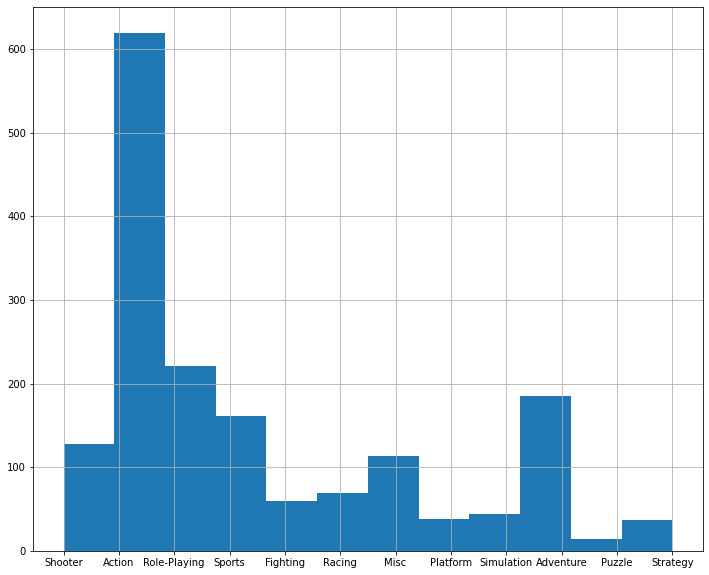

In [53]:
data_2014_2016['genre'].hist(bins=12,figsize=(12,10));

In [54]:
#смотрим какой жанр самый прибыльный 
data_2014_2016.groupby('genre')['total_sales_all_regeon'].sum()

genre
Action          199.36
Adventure        17.55
Fighting         28.22
Misc             37.55
Platform         18.09
Puzzle            2.21
Racing           27.52
Role-Playing    101.44
Shooter         170.94
Simulation       13.13
Sports          109.48
Strategy          3.96
Name: total_sales_all_regeon, dtype: float64

Вывод:     

Самый популярный жанр это Action он же приносит много прибыли, судя по всему берёт числом
за жанром Action , идут почти рядом игры относящиеся к жанру Sports

Что интересно, самым доходным является жанр Shooter 
возможно что большинство игр имеют два жанра , то есть большинство игр с жанром Shooter это еще и Action

В середине нашего списка игры по жанрам Racing, Misc.

Такие жанры как Puzzle и Strategy намного менее популярны, хотя по стратегиям надо проверять возможно множество было с неопределенным жанром и пострадало при чистке пропусков


## Составьте портрет пользователя каждого региона</b>
    
Задача:    
    
<br>Определите для пользователя каждого региона (NA, EU, JP):  
    
Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Самые популярные жанры (топ-5). Поясните разницу.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?
        <div>

In [55]:
# Регион NA 
na_sales_first_five_platforms = (data_2014_2016.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
    .head()
)
# Регион EU
eu_sales_first_five_platforms = (data_2014_2016.groupby('platform')['eu_sales'].sum().sort_values(ascending = False) 
    .head()
)

# Регион JP
jp_sales_first_five_platforms = (data_2014_2016.groupby('platform')['jp_sales'].sum().sort_values(ascending = False) 
    .head()
)

In [56]:
na_sales_first_five_platforms

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

In [57]:
eu_sales_first_five_platforms

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

In [58]:
jp_sales_first_five_platforms

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

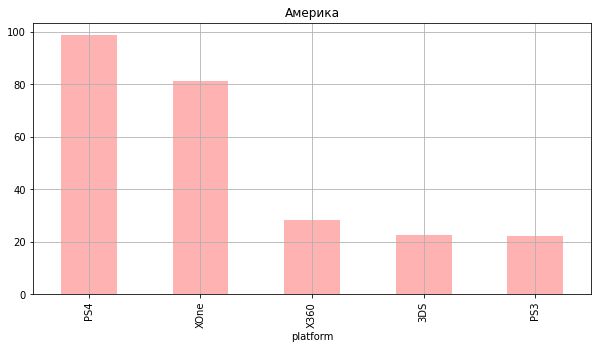

In [59]:
na_sales_first_five_platforms.plot(
    x='platform',
    y='na_sales',
    kind='bar',
    grid = True,
    figsize=(10, 5),
    color='red',
    alpha=0.3,
    title = 'Америка'
    );



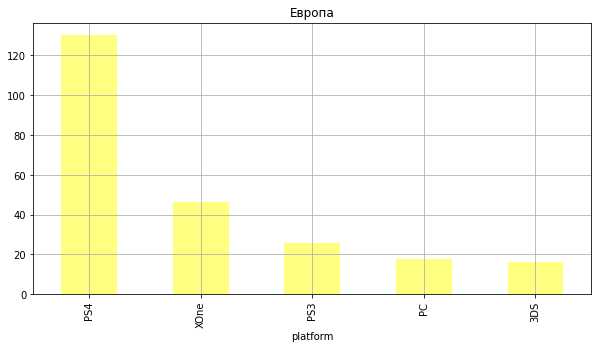

In [60]:
eu_sales_first_five_platforms.plot(
    x='platform',
    y='eu_sales',
    kind='bar',
    grid = True,
    figsize=(10, 5),
    alpha=0.5,
    title = 'Европа',
    color='yellow'

);




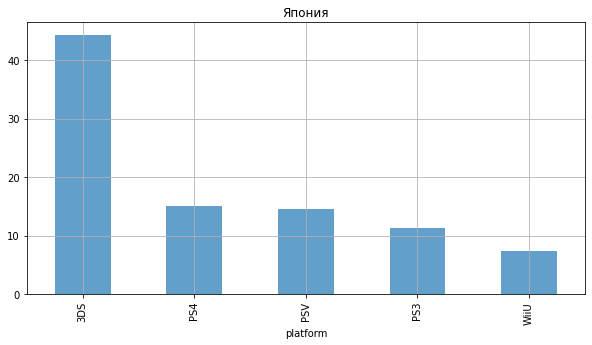

In [61]:
jp_sales_first_five_platforms.plot(
    x='platform',
    y='jp_sales',
    kind='bar',
    grid = True,
    figsize=(10, 5),
    alpha=0.7,
    title = 'Япония'
    );

Ответ на вопрос - самые популярные платформы (топ-5). Опишите различия в долях продаж.
      
Как видно из графика выше в Северной Америке лидируют платформы PS4 и XOne с отрывом от других платформ
Также видно, что рынок продаж в Северной Америке и Европы сопоставимы , а рынок Японии заметно уступает.

В Европе бесспорный лидер платформа PS4 платформы других брендов сильно отстают рынок продаж сопоставим с рынком 
Северной Америки

В Японии общий рынок платформ намного ниже, почти в пять раз, лидера в платформах, на этот раз платформа 3DS




### Самые популярные жанры (топ-5). Поясните разницу.


In [62]:
na_sales_first_five_platforms = (
    data_2014_2016
    .groupby('platform')['na_sales'].sum().sort_values(ascending = False) 
    .head()
)

In [63]:
na_popular_genre = data_2014_2016.groupby('genre')['na_sales'].sum().sort_values(ascending = False)
na_popular_genre.head()

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

In [64]:
eu_popular_genre = data_2014_2016.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)
eu_popular_genre.head()

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In [65]:
jp_popular_genre = data_2014_2016.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)
jp_popular_genre.head()

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

Вывод:
Европа почти не отличается от Америки пятерка состоит из одних и тех же жанров с небольшими изменениями в позициях
в конце

Когда покупатели Японского рынка видеоигр предпочитают те жанры которых нет в топе рынков Евролпы и Америи
это жанр Role-Playing 

Задача:
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [66]:
rating_na = data_2014_2016.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na

rating
M          96.42
unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

In [67]:
data_2014_2016.pivot_table(index=['rating'],
                 values=['eu_sales','na_sales','jp_sales'],
                 aggfunc = np.sum,
                 margins = True)
    

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknown,58.95,56.90,64.72
All,270.68,93.09,284.06


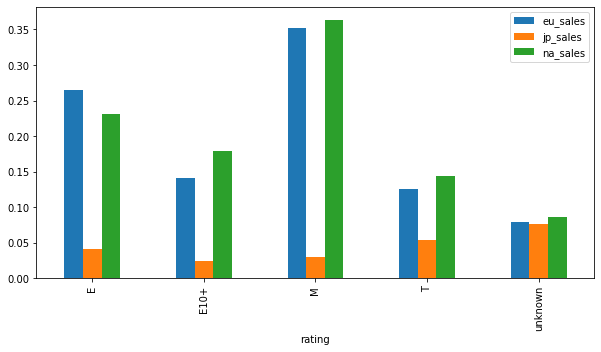

In [68]:
(
    data_2014_2016
    .pivot_table(index=['rating'],
                               values=['eu_sales','na_sales','jp_sales'],
                 
                )
    .plot(
        kind='bar',
        figsize=(10,5)
         )
    
);
   

отдельно взял японский рынок  

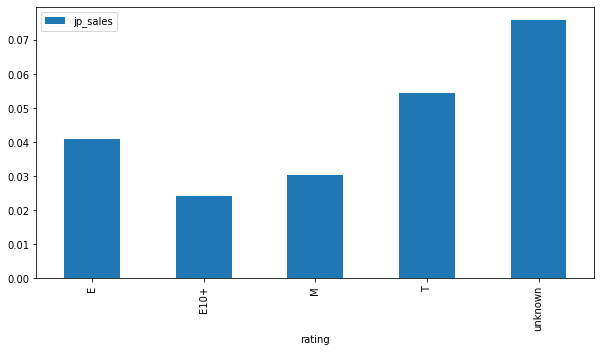

In [69]:
(
    data_2014_2016
    .pivot_table(index=['rating'],
                               values=['jp_sales'],
                 
                )
    .plot(
        kind='bar',
        figsize=(10,5)
         )
    
);

### Проверьте гипотезы

    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [70]:
data_2014_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1689 non-null   object 
 1   platform                1689 non-null   object 
 2   year_of_release         1689 non-null   int64  
 3   genre                   1689 non-null   object 
 4   na_sales                1689 non-null   float64
 5   eu_sales                1689 non-null   float64
 6   jp_sales                1689 non-null   float64
 7   other_sales             1689 non-null   float64
 8   critic_score            718 non-null    float64
 9   user_score              888 non-null    float64
 10  rating                  1689 non-null   object 
 11  total_sales_all_regeon  1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 158.5+ KB


работаем с гипотезой №1

Перед проверками гипотиз удаляем пропуски в данных так как с ними не полается провести проверку и 

нулевая гипотизе -  Средние пользовательские рейтинги платформ Xbox One и PC ОДИНАКОВЫЕ

альтернативная гипотиза =  Средние пользовательские рейтинги платформ Xbox One и PC НЕ ОДИНАКОВЫЕ


In [71]:
data_2014_2016=data_2014_2016.dropna(subset=['user_score','critic_score'])

In [72]:
data_2014_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 1 to 1682
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    704 non-null    object 
 1   platform                704 non-null    object 
 2   year_of_release         704 non-null    int64  
 3   genre                   704 non-null    object 
 4   na_sales                704 non-null    float64
 5   eu_sales                704 non-null    float64
 6   jp_sales                704 non-null    float64
 7   other_sales             704 non-null    float64
 8   critic_score            704 non-null    float64
 9   user_score              704 non-null    float64
 10  rating                  704 non-null    object 
 11  total_sales_all_regeon  704 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 71.5+ KB


In [73]:
data_2014_2016.isna().sum()

name                      0
platform                  0
year_of_release           0
genre                     0
na_sales                  0
eu_sales                  0
jp_sales                  0
other_sales               0
critic_score              0
user_score                0
rating                    0
total_sales_all_regeon    0
dtype: int64

In [74]:
xbox_platform = data_2014_2016.query('platform =="XOne"')
pc_platform = data_2014_2016.query('platform =="PC"')

xbox = xbox_platform['user_score']
pc = pc_platform['user_score']

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xbox, 
    pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    

p-значение: 0.12817793652639856
Не получилось отвергнуть нулевую гипотезу


***
***Не получилось отвергнуть нулевую гипотезу, значит, возможно, что Средние пользовательские рейтинги платформ Xbox One и PC 
ОДИНАКОВЫЕ ***

Как вы сформулировали нулевую и альтернативную гипотезы:
Я сформулировал нулевую и альтернативную гипотезы простыми словами либо она подтверждается, либо нет третьего быть не может

Какой критерий применили для проверки гипотез и почему:
к сожалению, я не понял вопроса-критерий оценки чего?
если имеется ввиду 'alpha' то я взял стандартный критически уровень


In [75]:
data_2014_2016['genre'].unique()


array(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing',
       'Platform', 'Simulation', 'Fighting', 'Adventure', 'Misc',
       'Puzzle', 'Strategy'], dtype=object)

работаем с гипотезой №2

нулевая гипотиза -  Средние пользовательские рейтинги жанров Action и Sports  одинаковые.

альтернативная гипотиза =   Средние пользовательские рейтинги жанров Action и Sports разные

In [76]:
action = data_2014_2016.query('genre =="Action"')
sports = data_2014_2016.query('genre =="Sports"')

action_user_score = action['user_score']
sports_user_score = sports['user_score']

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action_user_score, 
    sports_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.0540895999943237e-10
Отвергаем нулевую гипотезу


Вывод:


## Общий вывод 
  
Было проведено исследование с целью выявить закономерности, определяющие успешность игры. 
    
Источники данных- открытые источники, в которых доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  Результаты исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на предстоящий 2017 год.    
    
Во время исследования были поставлены промежуточные задачи:
    
•	как менялись продажи по платформам за весь период существования
    
•	были выбраны платформы с наибольшими суммарными продажами и представлен график по годам. 
    
•	было выявлено за какой срок появляются новые и исчезают старые платформы?
    
На основе результата промежуточных задач, было выявлено, что средний срок жизни платформ это десять лет. Следовательно прогноз на предстоящий год необходимо делать только за предыдущие отчетные периоды это 2014-2015, нынешний 2016 отчетный год еще не закончен и не сможет быть взят в работу. 
    
В результате анализа игровых платформ за последние два года, были получены данные о самых успешных.
    
Все данные за актуальный период были поделены на три основных региона, так как как от региона выводы могут отличатся 
    
•	Северная Америка 
    
•	Европа
    
•	Япония
    
Продажи
    
•	По объёму продаж, регионах Северная Америка и Европа стала платформа PS4, на втором месте XOne
    
•	По рынку Японии лидером стала платформа 3DS она бесспорный лидер 
    
Жанры
    
•	Жанры, которые предпочитают пользователи по всем регионам Северная Америка и Европа это Action на втором месте Shooter 
    
•	На Японском рынке лидером является такой жанр как Role-Playing, втором месте Action
    
Рейтинг
    
•	Рейтинг, который выбирают в регионах Северная Америка и Европа — это рейтинг ‘M’, на втором месте рейтинг “E”
    
•	В Японском рынке рейтинг первым является рейтинг “E” на втором месте “Е” 
    
В данных по рейтингу очень много пропущенных значений и эти данные могут сделать выводы не точными.



На основе проведенного исследования мы можем сделать вывод перспективной платформой PS4 для регионов Северная Америка и Европа она бесспорный лидер, эта платформ только набирает обороты и именно на нее следует делать ставку в следующий год, для Японского рынка платформа 3DS самый перспективный вариант.
Оценки критиков в совокупности имеют большее влияние на продажи, этому факту влияющему на продажи стоит уделить внимание.
Рейтинги и жанры отличаются в зависимости от региона на это следует обращать внимание при построении рекламных кампаний. Для Америки и Европы жанры Action и Shooter лидеры и рейтинг ‘M’. Для региона Японии следует сделать ставку на жанр Role-Playing и рейтинг “E”
